# Postprocesss gamma results

In [1]:
import numpy as np
import pynektools as pynek

from mpi4py import MPI #equivalent to the use of MPI_init() in C
import matplotlib.pyplot as plt
import matplotlib.tri as tri
comm = MPI.COMM_WORLD


[n191-p98.eduroam.kth.se:14282] shmem: mmap: an error occurred while determining whether or not /var/folders/5y/3rhs_7h91qj213cv2yx3c4880000gn/T//ompi.n191-p98.501/jf.0/2406088704/sm_segment.n191-p98.501.8f6a0000.0 could be created.


In [2]:
from pynektools.io.ppymech.neksuite import preadnek
from pynektools.datatypes.msh import Mesh as msh_c
from pynektools.datatypes.coef import Coef as coef_c
from pynektools.datatypes.field import Field as field_c
from pynektools.interpolation.probes import Probes as probes_c

h5py not found. HDF5 files will not be supported


In [3]:
xyz_info = preadnek("gamma_0.0001/field0.f00000", comm)
msh = msh_c(comm, data = xyz_info)

coef = coef_c(msh, comm)

2025-02-03 13:53:18,440 - preadnek - INFO - Reading file: gamma_0.0001/field0.f00000
2025-02-03 13:53:18,471 - preadnek - INFO - Elapsed time: 0.031647s
2025-02-03 13:53:18,472 - Mesh - INFO - Initializing Mesh object from HexaData object.
2025-02-03 13:53:18,474 - Mesh - INFO - Initializing common attributes.
2025-02-03 13:53:18,475 - Mesh - INFO - Getting vertices
2025-02-03 13:53:18,475 - Mesh - INFO - Getting edge centers
2025-02-03 13:53:18,477 - Mesh - INFO - Getting facet centers
2025-02-03 13:53:18,478 - Mesh - INFO - Creating connectivity
2025-02-03 13:53:18,598 - Mesh - INFO - Mesh object initialized.
2025-02-03 13:53:18,598 - Mesh - INFO - Mesh data is of type: float64
2025-02-03 13:53:18,598 - Mesh - INFO - Elapsed time: 0.126421s
2025-02-03 13:53:18,599 - Coef - INFO - Initializing Coef object
2025-02-03 13:53:18,599 - Coef - INFO - Getting derivative matrices
2025-02-03 13:53:18,600 - Coef - INFO - Calculating the components of the jacobian
2025-02-03 13:53:18,633 - Coef 

In [4]:
#Original_field 
def initial_condition(x,y,eps):
    rad = np.sqrt((x-0.5)**2 +(y-0.75)**2)
    return 0.5*(1+np.tanh((rad-0.15)/(2*eps)))
epsilon = 0.01
ic = initial_condition(msh.x,msh.y,epsilon)


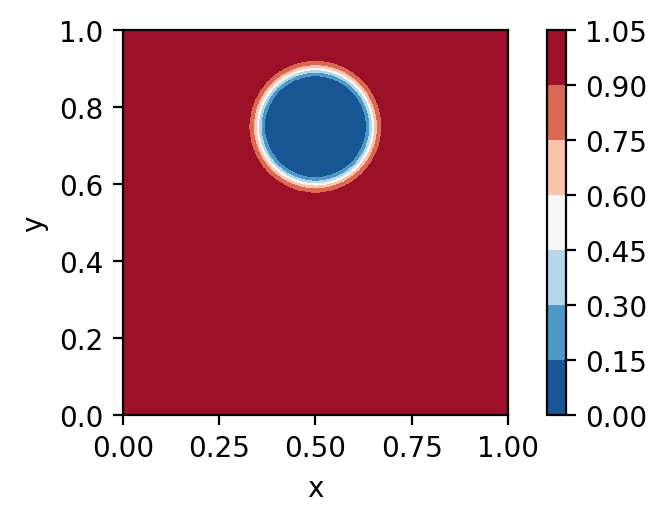

In [5]:

fig, ax = plt.subplots(figsize=(5, 2.5), dpi = 200)
c = ax.tricontourf(msh.x.flatten(), msh.y.flatten() ,ic.flatten(), cmap="RdBu_r")

fig.colorbar(c)
ax.set_aspect('equal')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

gamma_0/field0.f00002
2025-02-03 13:53:19,983 - preadnek - INFO - Reading file: gamma_0/field0.f00002
2025-02-03 13:53:19,994 - preadnek - INFO - Elapsed time: 0.011077000000000004s
2025-02-03 13:53:19,995 - Field - INFO - Initializing Field object from HexaData
2025-02-03 13:53:19,997 - Field - INFO - Field object initialized
2025-02-03 13:53:19,998 - Field - INFO - Elapsed time: 0.002758000000000038s
Gamma  0 1.0000035762786865 -1.415994393028086e-05
gamma_0.000001/field0.f00002
2025-02-03 13:53:20,241 - preadnek - INFO - Reading file: gamma_0.000001/field0.f00002
2025-02-03 13:53:20,252 - preadnek - INFO - Elapsed time: 0.010518999999999945s
2025-02-03 13:53:20,253 - Field - INFO - Initializing Field object from HexaData
2025-02-03 13:53:20,255 - Field - INFO - Field object initialized
2025-02-03 13:53:20,255 - Field - INFO - Elapsed time: 0.0021450000000000635s
Gamma  0.000001 1.0001720190048218 -5.400430381996557e-05
gamma_0.00001/field0.f00002
2025-02-03 13:53:20,496 - preadnek -

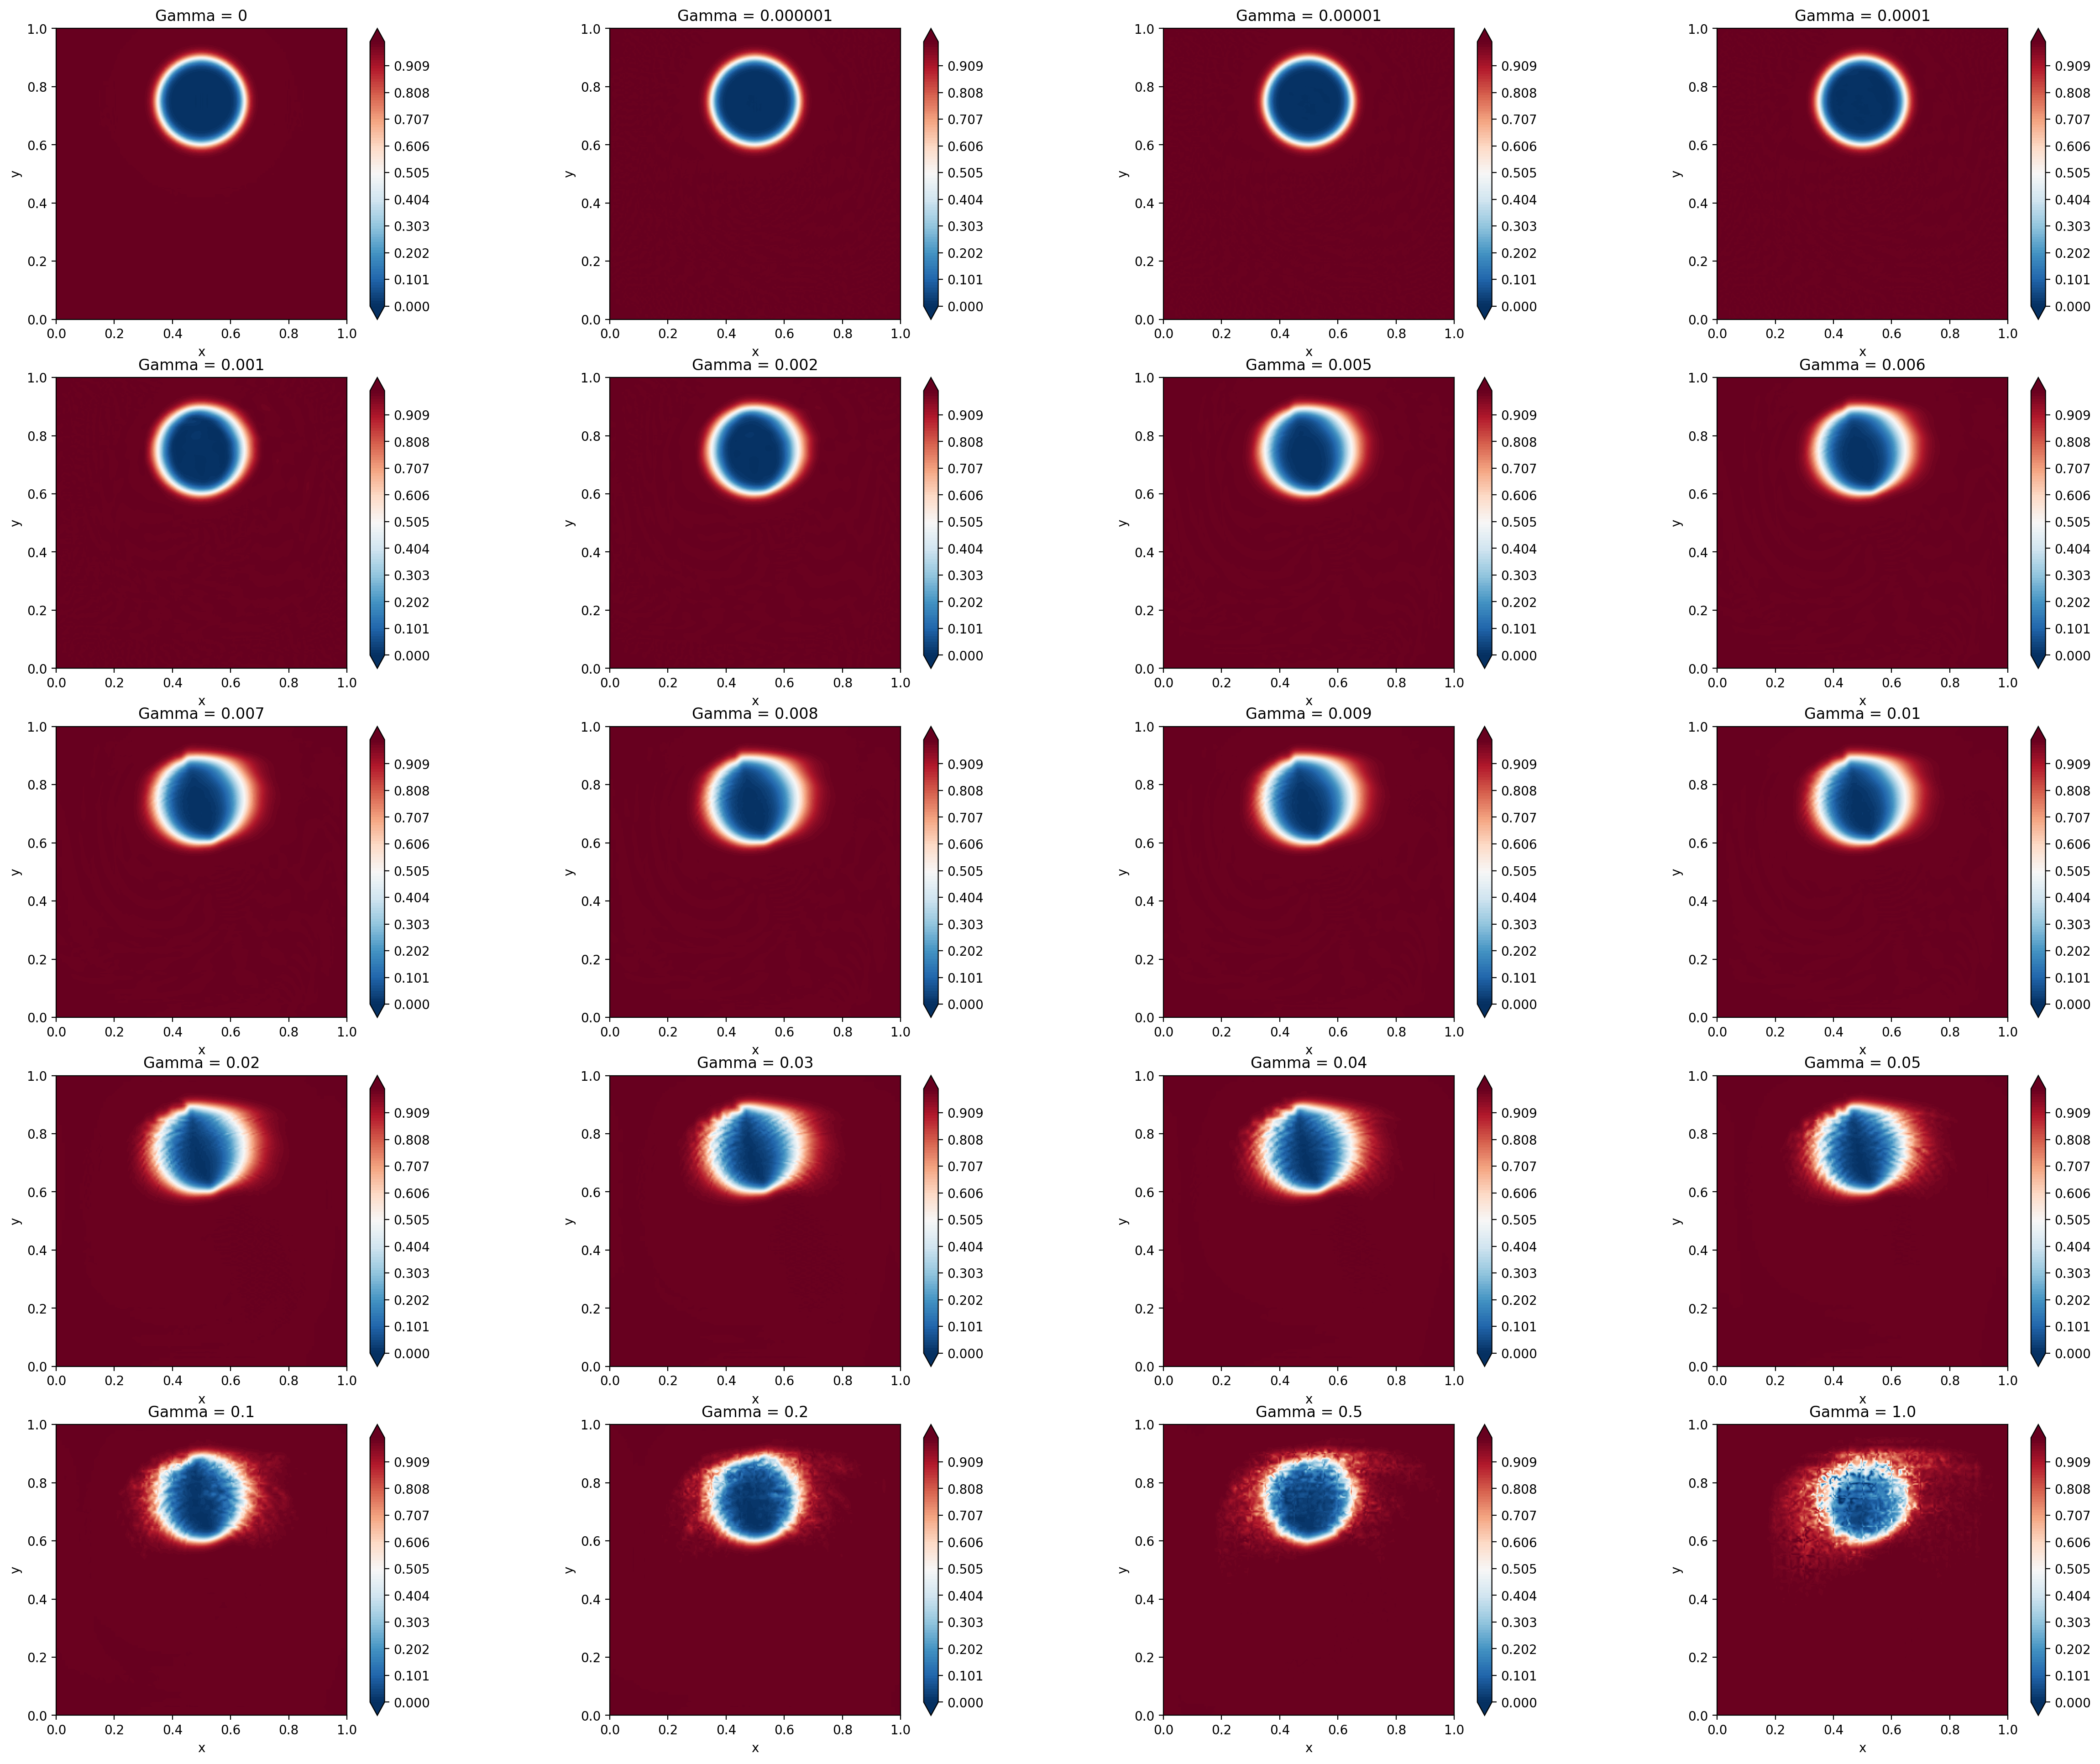

In [6]:
# Plot for all gammas
gammas = ["0", "0.000001", "0.00001", "0.0001","0.001", "0.002", "0.005","0.006", "0.007", "0.008", "0.009", "0.01", "0.02","0.03", "0.04", "0.05", "0.1", "0.2", "0.5", "1.0"]
n_gammas = len(gammas)

fig, ax = plt.subplots((n_gammas+3)//4,4,figsize=(6*((n_gammas+3)//4), 4*6), dpi = 200)
ax = ax.ravel()
for i,gamma in enumerate(gammas):
    file_name = "gamma_" + gamma + "/field0.f00002"
    print(file_name)
    t4 = preadnek(file_name, comm)
    fld = field_c(comm, data = t4)
    
    levels = np.linspace(0, 1, 100)
    c = ax[i].tricontourf(msh.x.flatten(), msh.y.flatten() ,fld.fields["temp"][0].flatten(), cmap="RdBu_r",levels=levels,extend="both")
    fig.colorbar(c)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title('Gamma = ' + gamma)
    print('Gamma ', str(gamma), np.max(fld.fields["temp"][0]),np.min(fld.fields["temp"][0]))
    #ax[i].set_clim(0,1)
ax = np.reshape(ax, ((n_gammas+3)//4,4))
plt.show()

gamma_0/field0.f00001
2025-02-03 13:53:26,995 - preadnek - INFO - Reading file: gamma_0/field0.f00001
2025-02-03 13:53:27,005 - preadnek - INFO - Elapsed time: 0.010144999999999627s
2025-02-03 13:53:27,006 - Field - INFO - Initializing Field object from HexaData
2025-02-03 13:53:27,008 - Field - INFO - Field object initialized
2025-02-03 13:53:27,008 - Field - INFO - Elapsed time: 0.0024650000000008276s
Gamma  0 1.2363477945327759 -0.18036207556724548
gamma_0.000001/field0.f00001
2025-02-03 13:53:27,272 - preadnek - INFO - Reading file: gamma_0.000001/field0.f00001
2025-02-03 13:53:27,282 - preadnek - INFO - Elapsed time: 0.01025000000000098s
2025-02-03 13:53:27,283 - Field - INFO - Initializing Field object from HexaData
2025-02-03 13:53:27,285 - Field - INFO - Field object initialized
2025-02-03 13:53:27,285 - Field - INFO - Elapsed time: 0.0019980000000003884s
Gamma  0.000001 1.2360246181488037 -0.18005187809467316
gamma_0.00001/field0.f00001
2025-02-03 13:53:27,547 - preadnek - INF

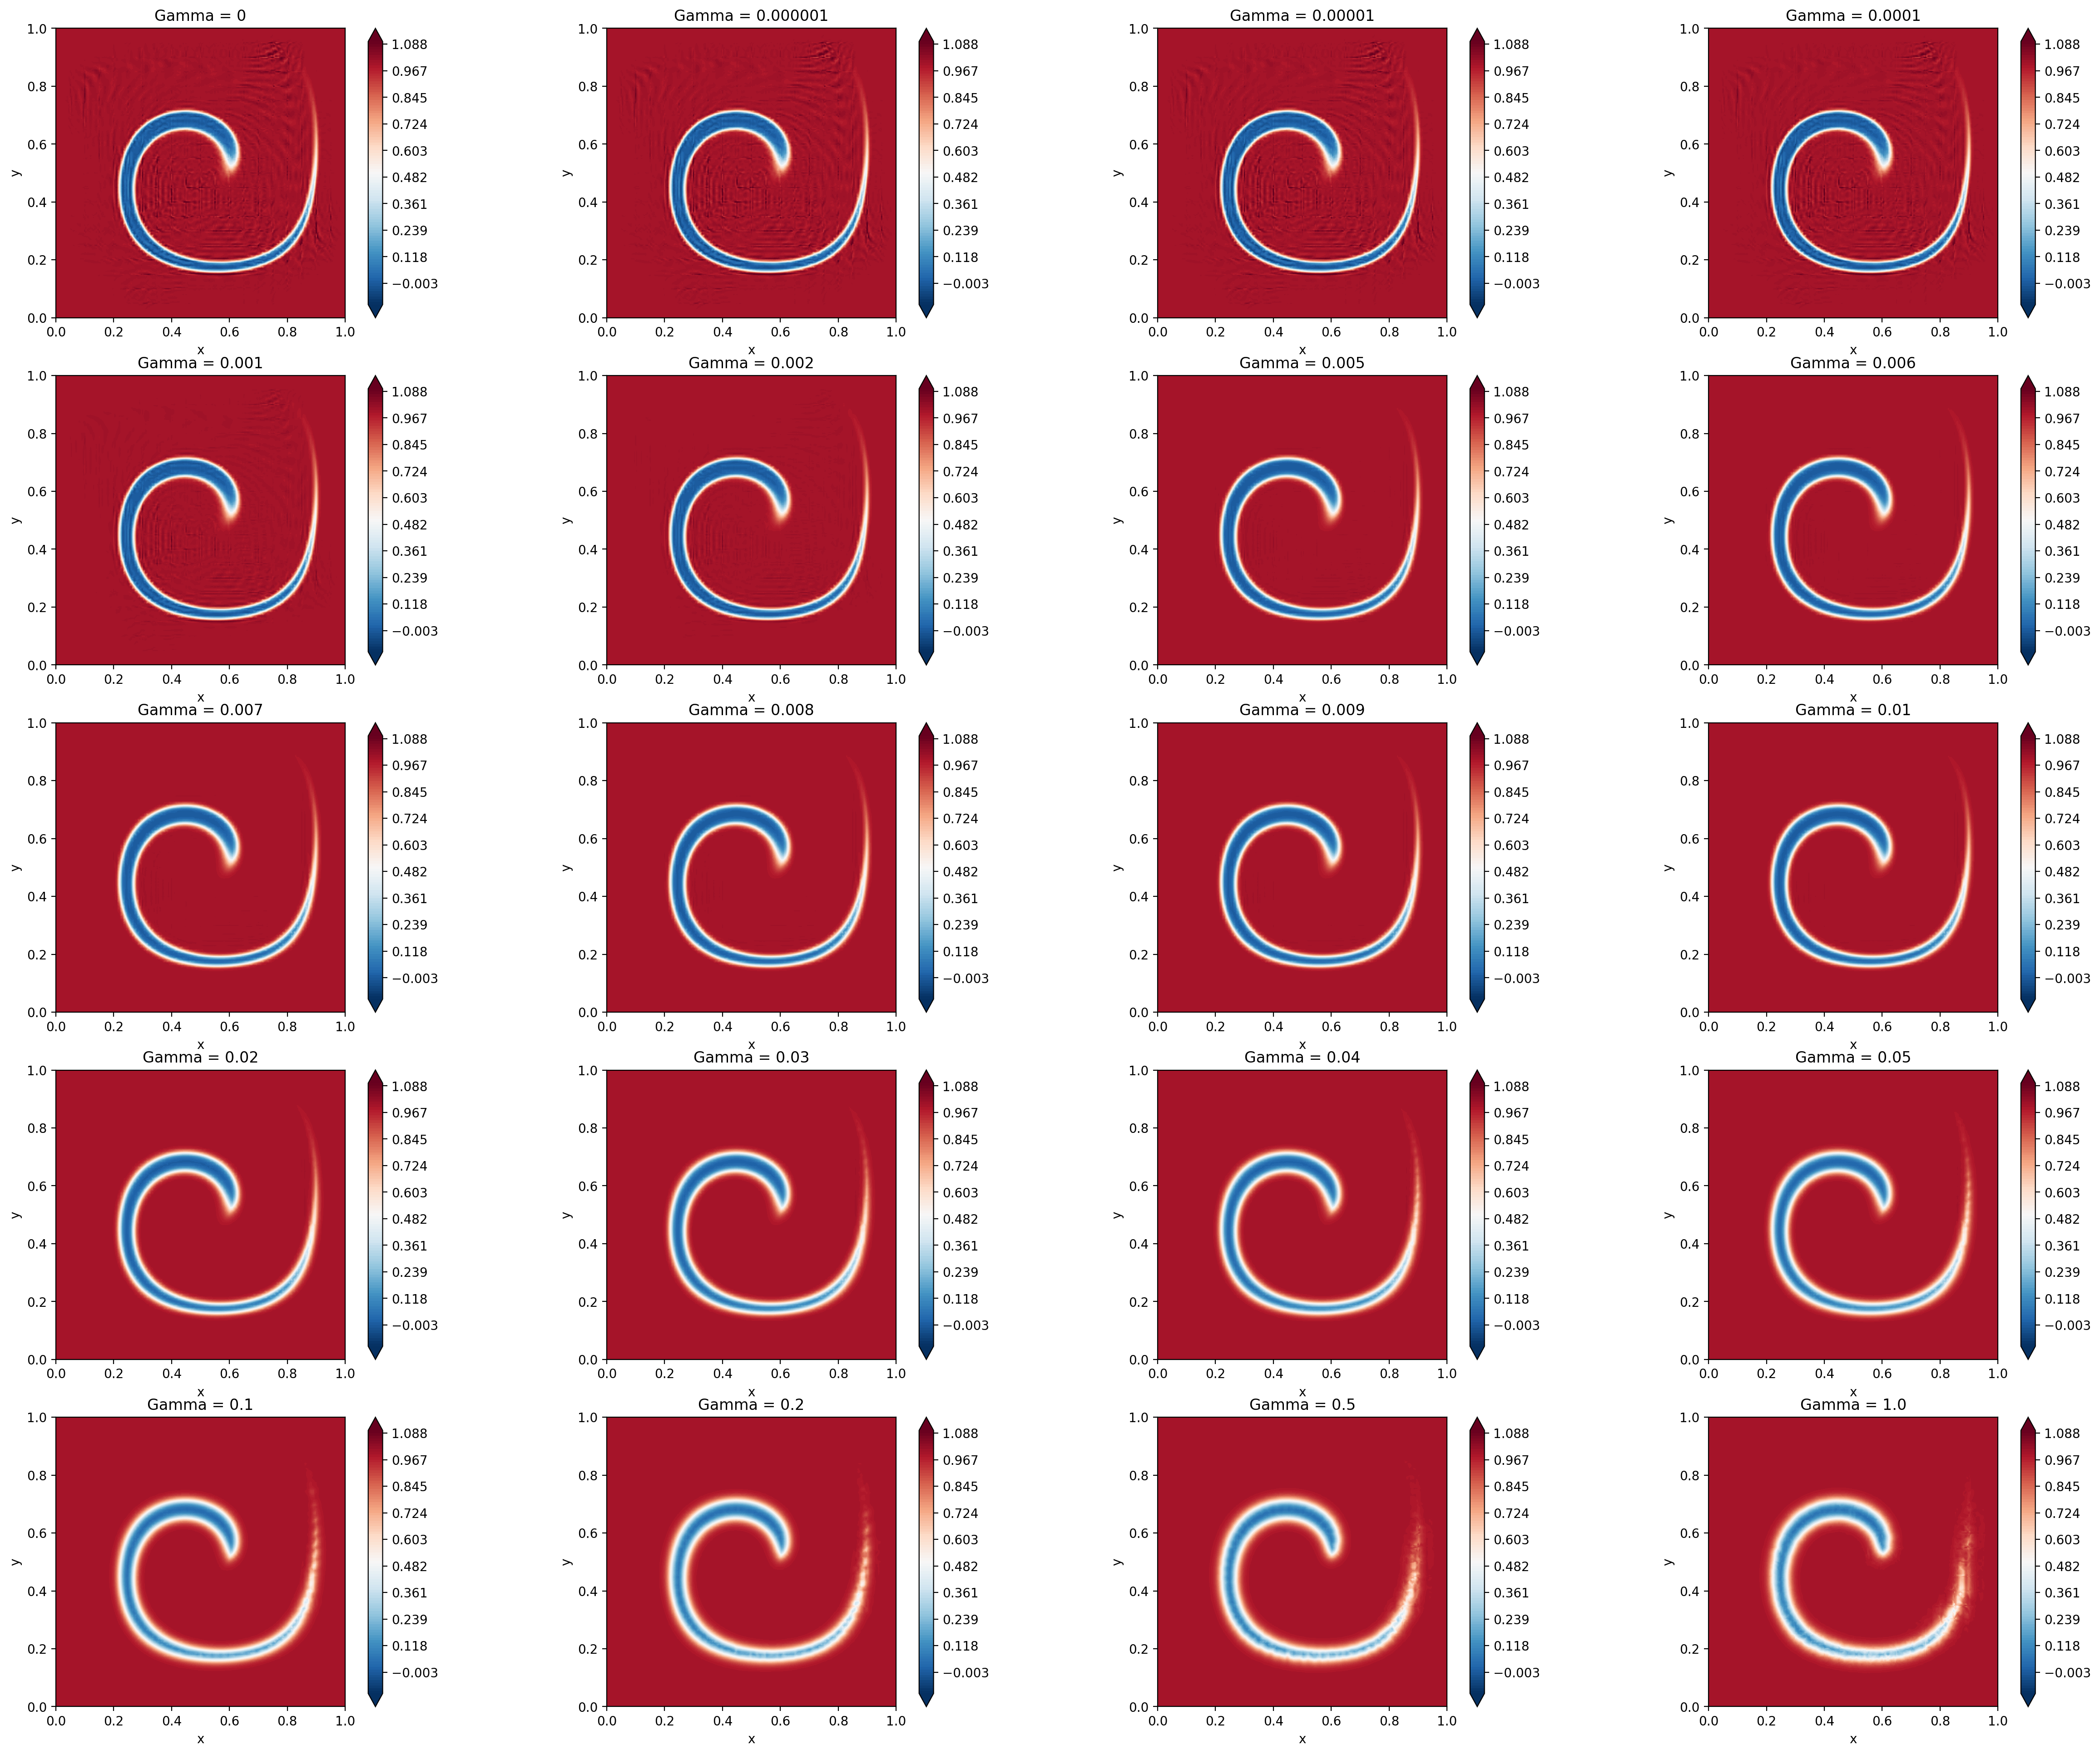

In [7]:
#Plot halfway
fig, ax = plt.subplots((n_gammas+3)//4,4,figsize=(6*((n_gammas+3)//4), 4*6), dpi = 200)
ax = ax.ravel()
for i,gamma in enumerate(gammas):
    file_name = "gamma_" + gamma + "/field0.f00001"
    print(file_name)
    t4 = preadnek(file_name, comm)
    fld = field_c(comm, data = t4)
    
    levels = np.linspace(-0.1, 1.1, 100)
    c = ax[i].tricontourf(msh.x.flatten(), msh.y.flatten() ,fld.fields["temp"][0].flatten(), cmap="RdBu_r",levels=levels,extend="both")
    fig.colorbar(c)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title('Gamma = ' + gamma)
    print('Gamma ', str(gamma), np.max(fld.fields["temp"][0]),np.min(fld.fields["temp"][0]))
    #ax[i].set_clim(0,1)
ax = np.reshape(ax, ((n_gammas+3)//4,4))
plt.show()

2025-02-03 14:17:49,725 - preadnek - INFO - Reading file: gamma_0/field0.f00002
2025-02-03 14:17:49,738 - preadnek - INFO - Elapsed time: 0.01322899999991023s
gamma_0/field0.f00002
2025-02-03 14:17:49,741 - Field - INFO - Initializing Field object from HexaData
2025-02-03 14:17:49,744 - Field - INFO - Field object initialized
2025-02-03 14:17:49,744 - Field - INFO - Elapsed time: 0.0035279999999602296s
Gamma  0 1.0000035762786865 -1.415994393028086e-05
2025-02-03 14:17:49,979 - preadnek - INFO - Reading file: gamma_0.000001/field0.f00002
2025-02-03 14:17:49,989 - preadnek - INFO - Elapsed time: 0.010033000000021275s
gamma_0.000001/field0.f00002
2025-02-03 14:17:49,991 - Field - INFO - Initializing Field object from HexaData
2025-02-03 14:17:49,993 - Field - INFO - Field object initialized
2025-02-03 14:17:49,993 - Field - INFO - Elapsed time: 0.0020549999999275315s
Gamma  0.000001 1.0001720190048218 -5.400430381996557e-05
2025-02-03 14:17:50,240 - preadnek - INFO - Reading file: gamma_

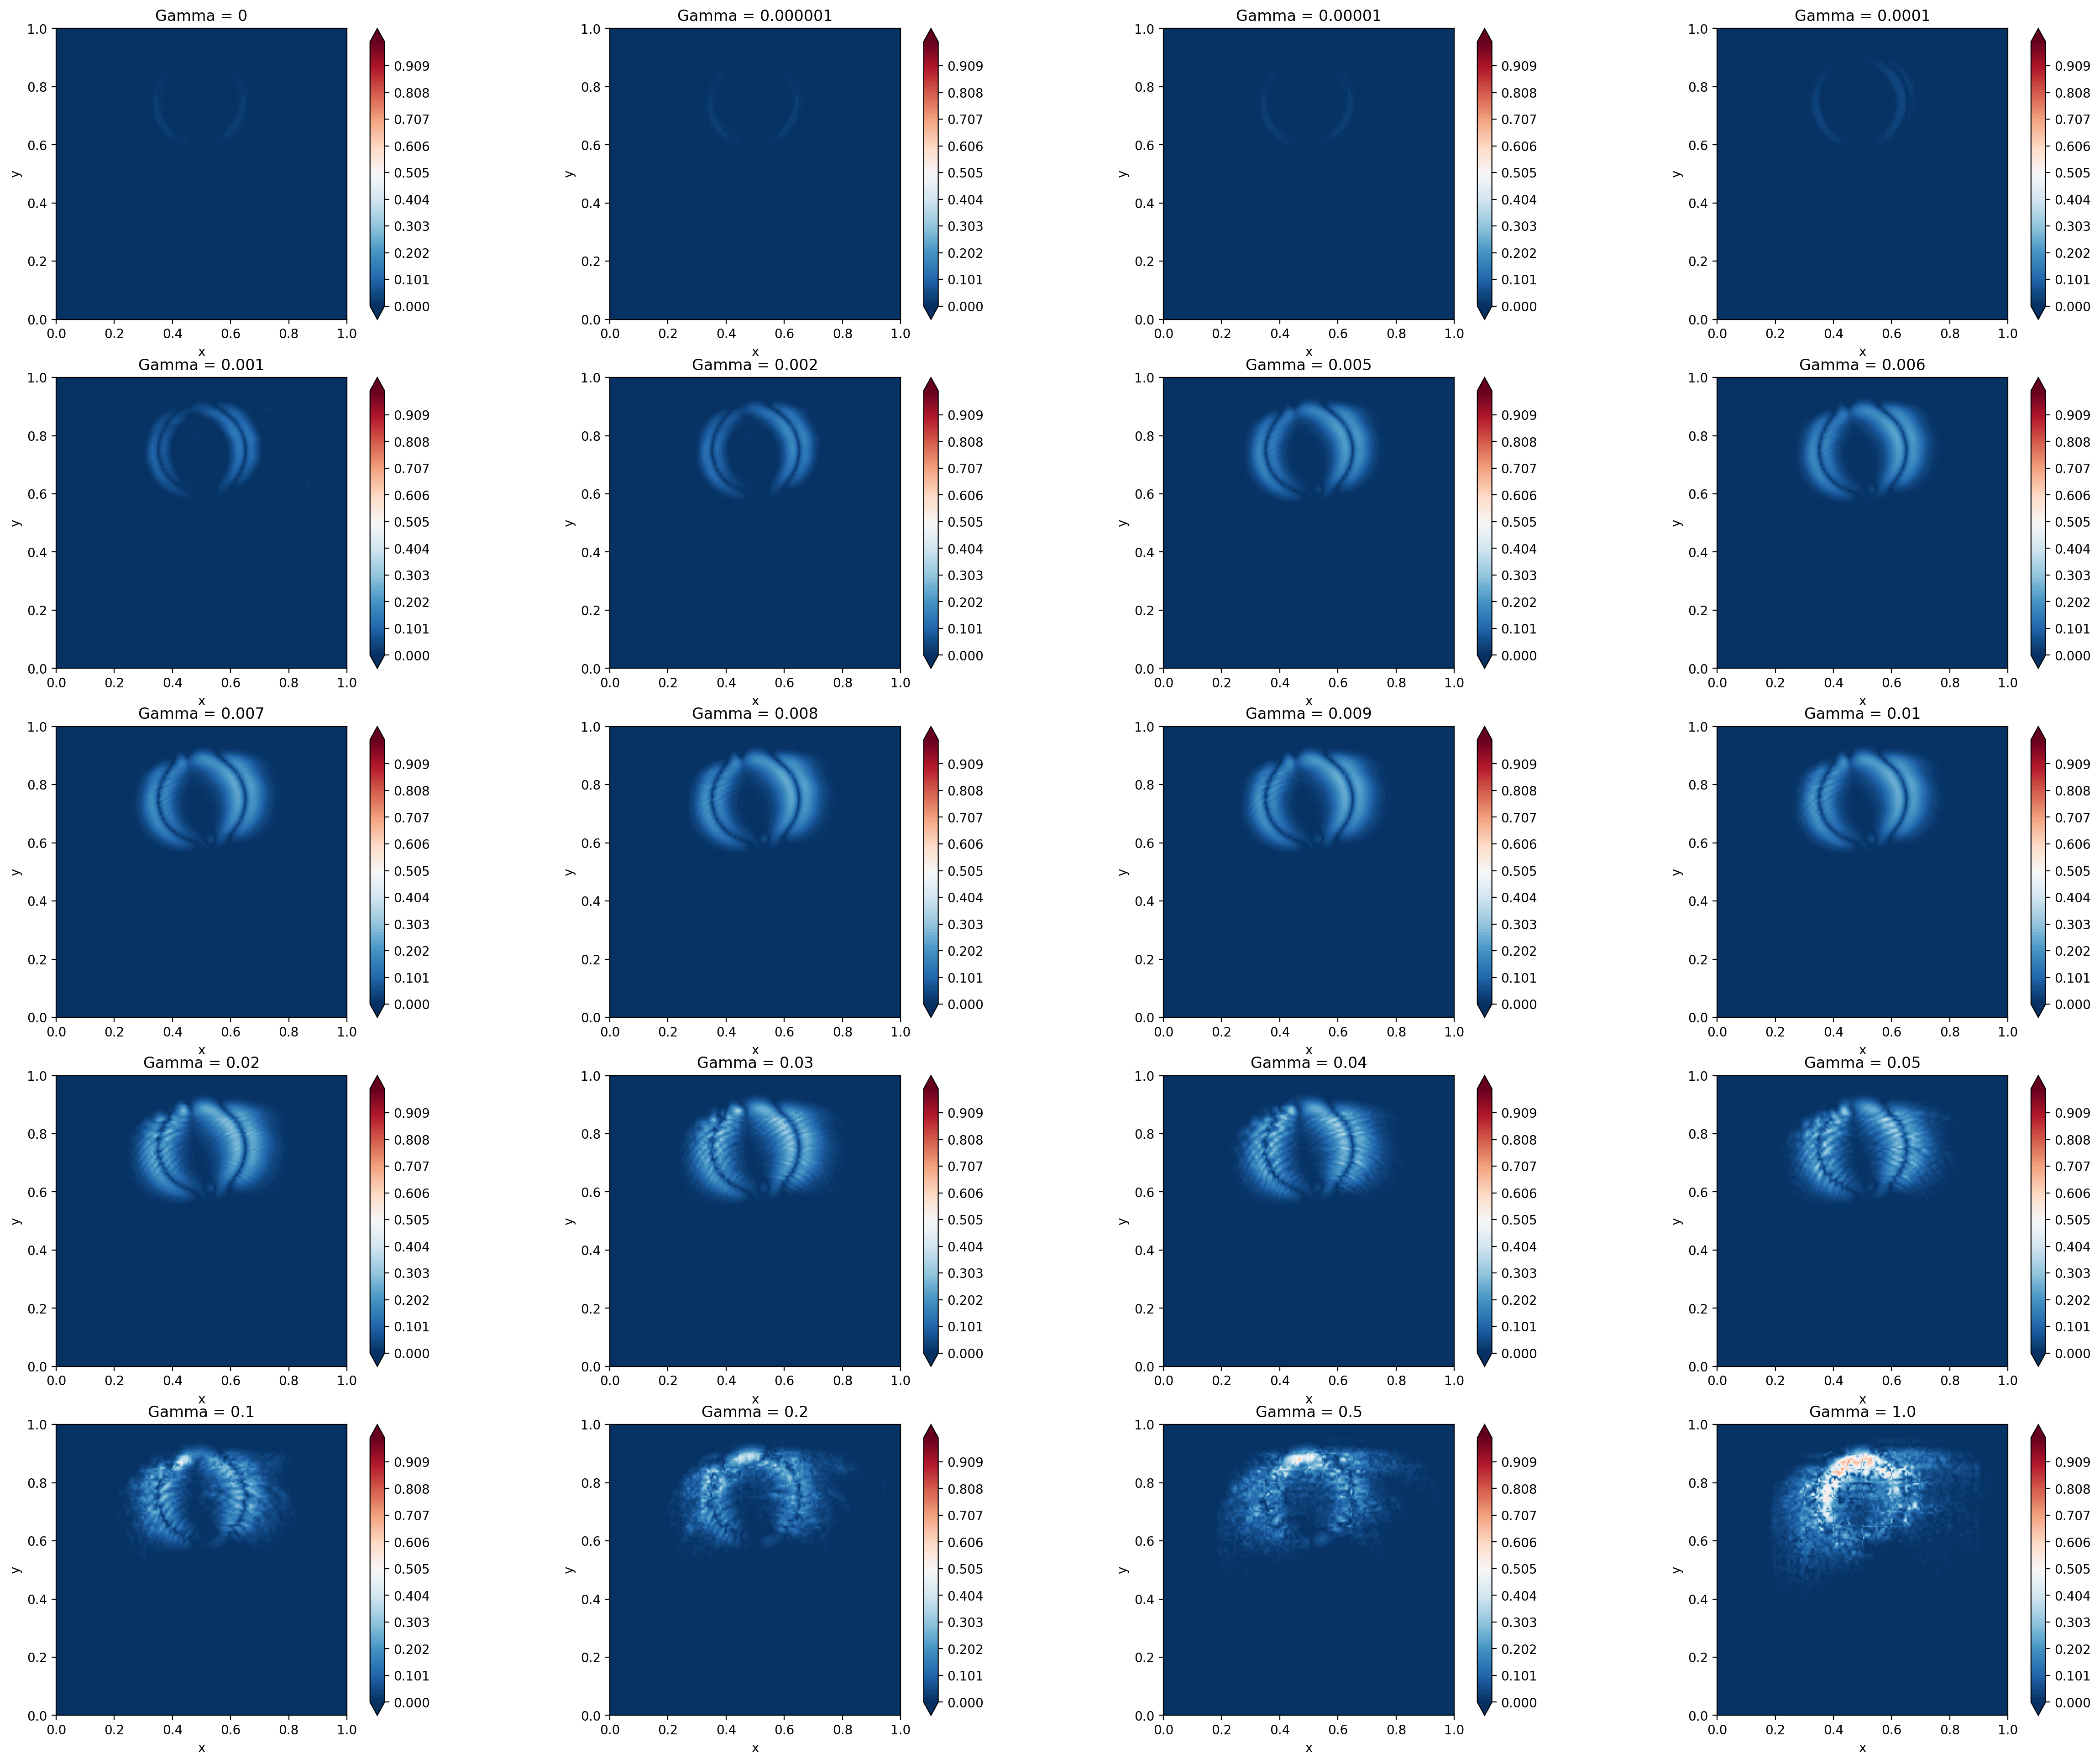

In [40]:
#Look at error
#Plot for all gammas
errors = np.zeros(n_gammas)

fig, ax = plt.subplots((n_gammas+3)//4,4,figsize=(6*((n_gammas+3)//4), 4*6), dpi = 200)
ax = ax.ravel()
for i,gamma in enumerate(gammas):
    file_name = "gamma_" + gamma + "/field0.f00002"
    t4 = preadnek(file_name, comm)
    print(file_name)
    fld = field_c(comm, data = t4)
    
    levels = np.linspace(0, 1, 100)
    c = ax[i].tricontourf(msh.x.flatten(), msh.y.flatten() ,np.abs(fld.fields["temp"][0].flatten()-ic.flatten()), cmap="RdBu_r",levels=levels,extend="both")
    fig.colorbar(c)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title('Gamma = ' + gamma)
    errors[i] = np.sum(np.abs(fld.fields["temp"][0]-ic)*coef.B)
    print('Gamma ', str(gamma), np.max(fld.fields["temp"][0]),np.min(fld.fields["temp"][0]))



Text(0.5, 0, '$\\gamma$')

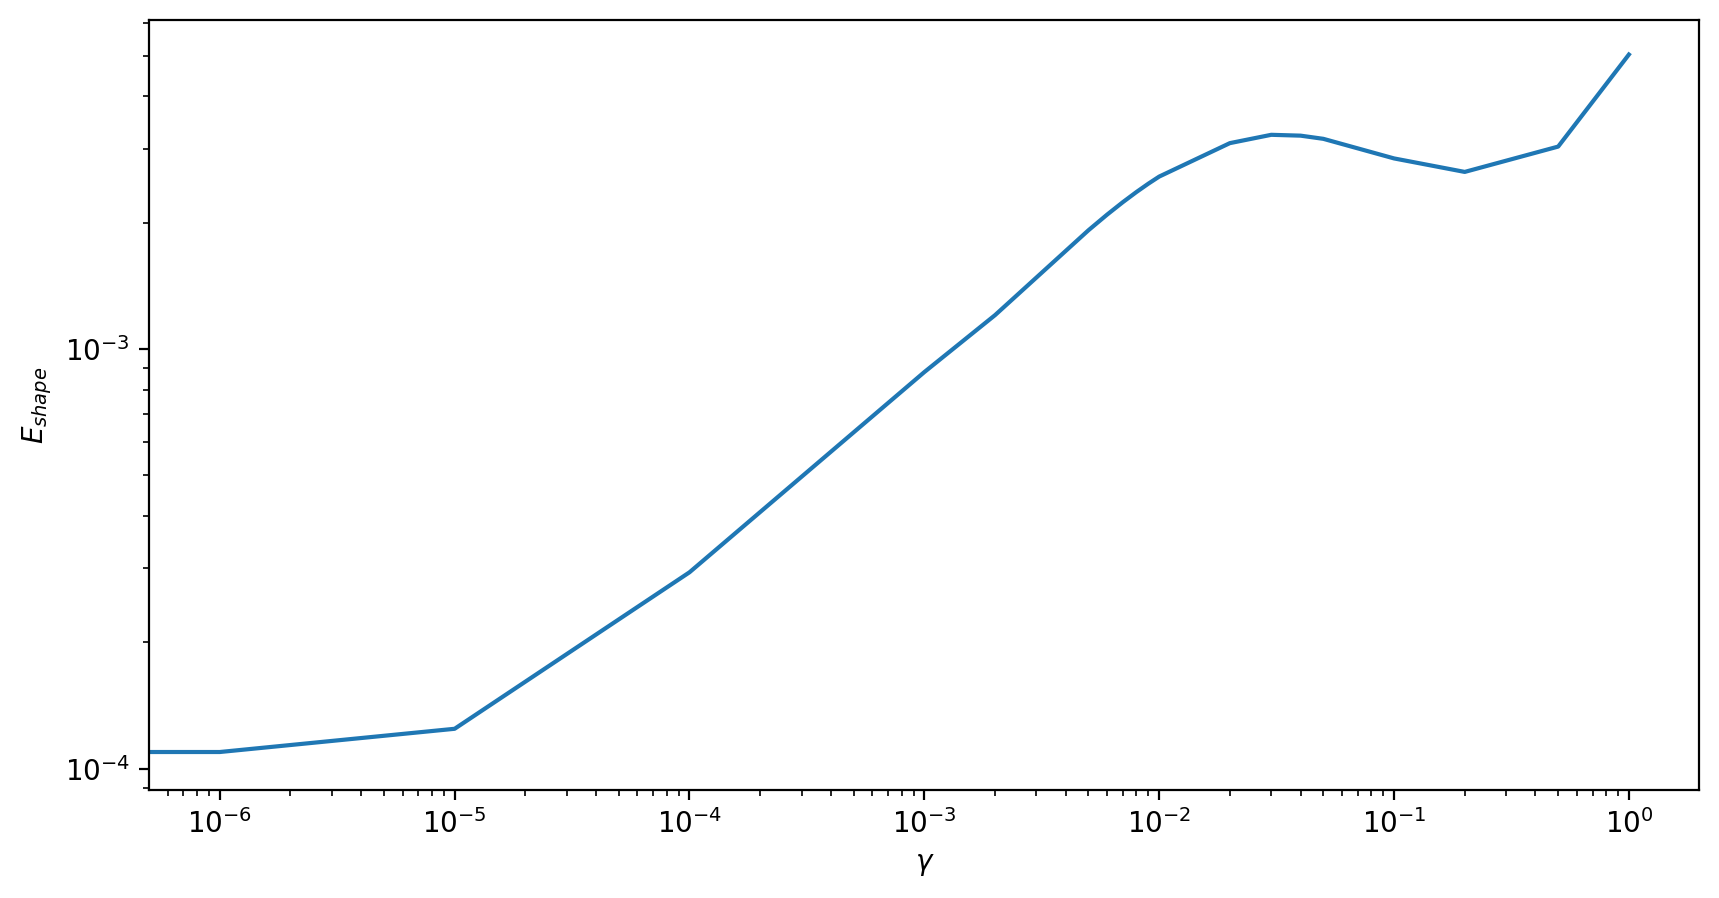

In [41]:

fig, ax = plt.subplots(1,figsize=(10, 5), dpi = 200)
ax.loglog([float(gamma)for gamma in gammas],errors)
ax.set_ylabel("$E_{shape}$")
ax.set_xlabel("$\\gamma$")

2025-02-03 14:19:40,178 - Probes - INFO - Initializing Probes object:
2025-02-03 14:19:40,179 - Probes - INFO -  ======= Settings =======
2025-02-03 14:19:40,179 - Probes - INFO - output_fname: ./interpolated_fields.csv
2025-02-03 14:19:40,179 - Probes - INFO - write_coords: True
2025-02-03 14:19:40,180 - Probes - INFO - progress_bar: False
2025-02-03 14:19:40,180 - Probes - INFO - point_interpolator_type: multiple_point_legendre_numpy
2025-02-03 14:19:40,180 - Probes - INFO - max_pts: 128
2025-02-03 14:19:40,180 - Probes - INFO - find_points_iterative: [False, 5000]
2025-02-03 14:19:40,181 - Probes - INFO - find_points_comm_pattern: point_to_point
2025-02-03 14:19:40,181 - Probes - INFO - elem_percent_expansion: 0.01
2025-02-03 14:19:40,181 - Probes - INFO - global_tree_type: rank_bbox
2025-02-03 14:19:40,183 - Probes - INFO - global_tree_nbins: 1024
2025-02-03 14:19:40,183 - Probes - INFO - use_autograd: False
2025-02-03 14:19:40,183 - Probes - INFO - find_points_tol: 2.2204460492503

Text(0.5, 0, '$\\gamma$')

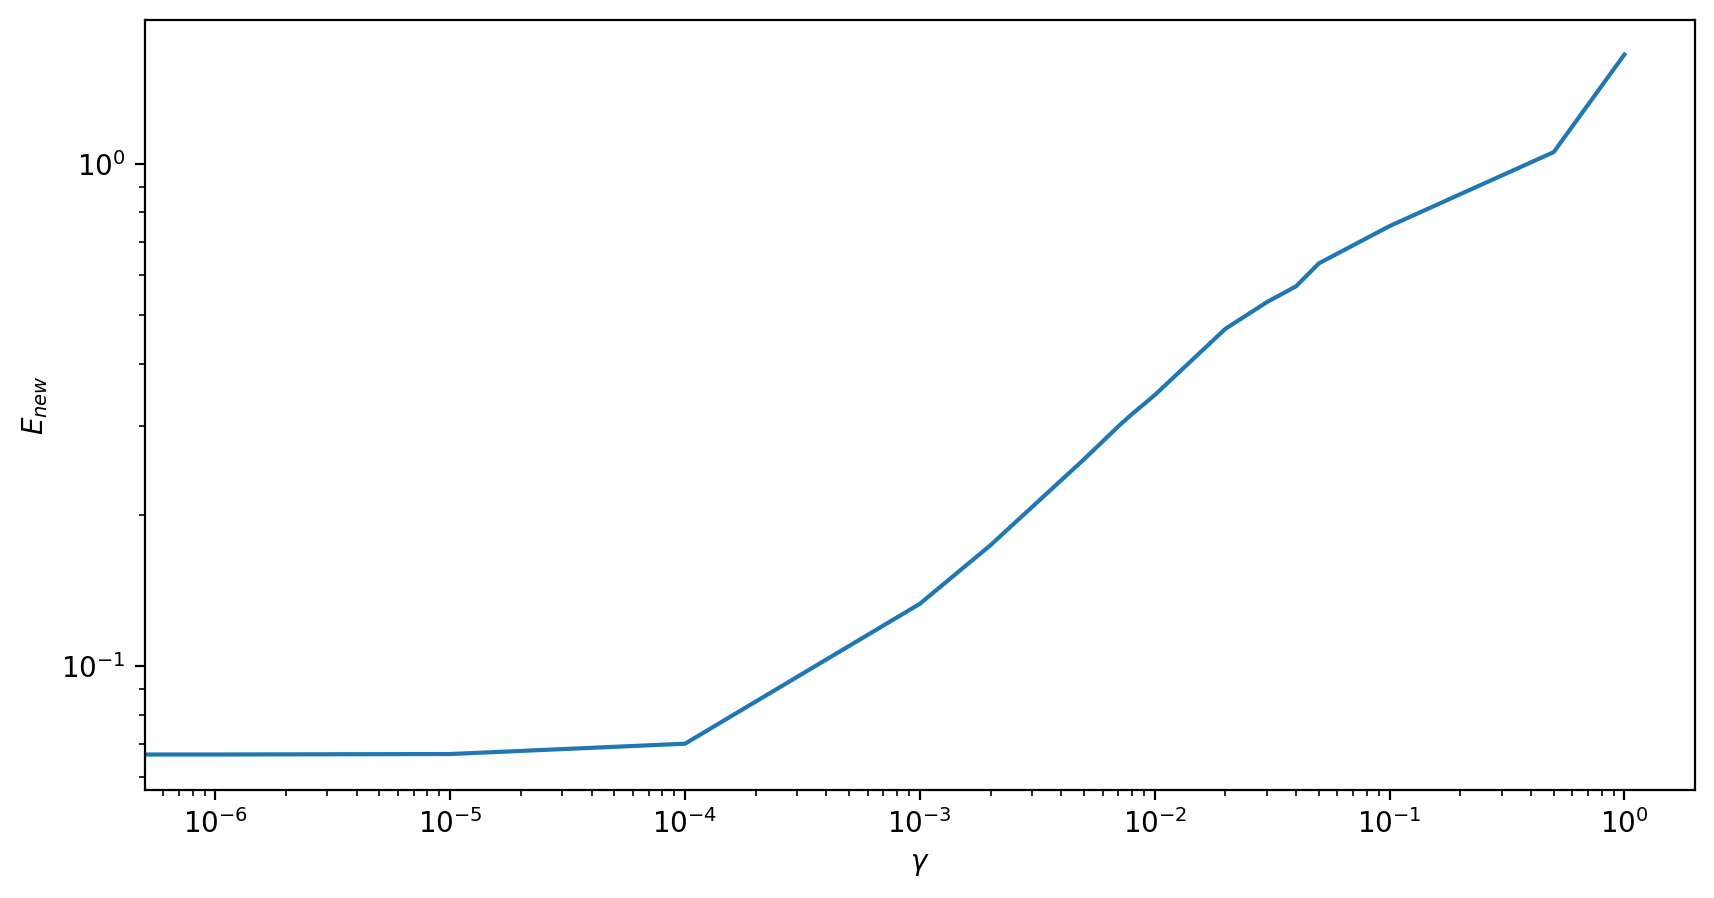

In [43]:
#Another error definition
#Cheks the difference between the value of the computed value and the circle att 0.5 in the original
#integral over initial_condiiton(x,y) = 0.5 - computedvalue(T=4,x,y) 
errors2 = np.zeros(n_gammas)

#Look at things around the cylinder
#Lets extract som lines
n_points = 10000
r = 0.15
line1 = np.zeros((n_points,3))
line1[:,0] = r*np.cos(np.linspace(np.pi,0,n_points))+0.5
line1[:,1] = r*np.sin(np.linspace(np.pi,0,n_points))+0.75
probes = probes_c(comm, probes = line1, msh = msh, progress_bar = False, point_interpolator_type='multiple_point_legendre_numpy')

for i,gamma in enumerate(gammas):
    file_name = "gamma_" + gamma + "/field0.f00002"
    print(file_name)
    t4 = preadnek(file_name, comm)
    fld = field_c(comm, data = t4)
    probes.interpolate_from_field_list(0.0, fld.fields["temp"], comm, write_data=False)
    errors2[i] = np.sum(abs(probes.interpolated_fields[:,1]-0.5)*2*np.pi/n_points)

fig, ax = plt.subplots(1,figsize=(10, 5), dpi = 200)
ax.loglog([float(gamma)for gamma in gammas],errors2)
ax.set_ylabel("$E_{new}$")
ax.set_xlabel("$\\gamma$")

Text(0.5, 0, '$\\gamma$')

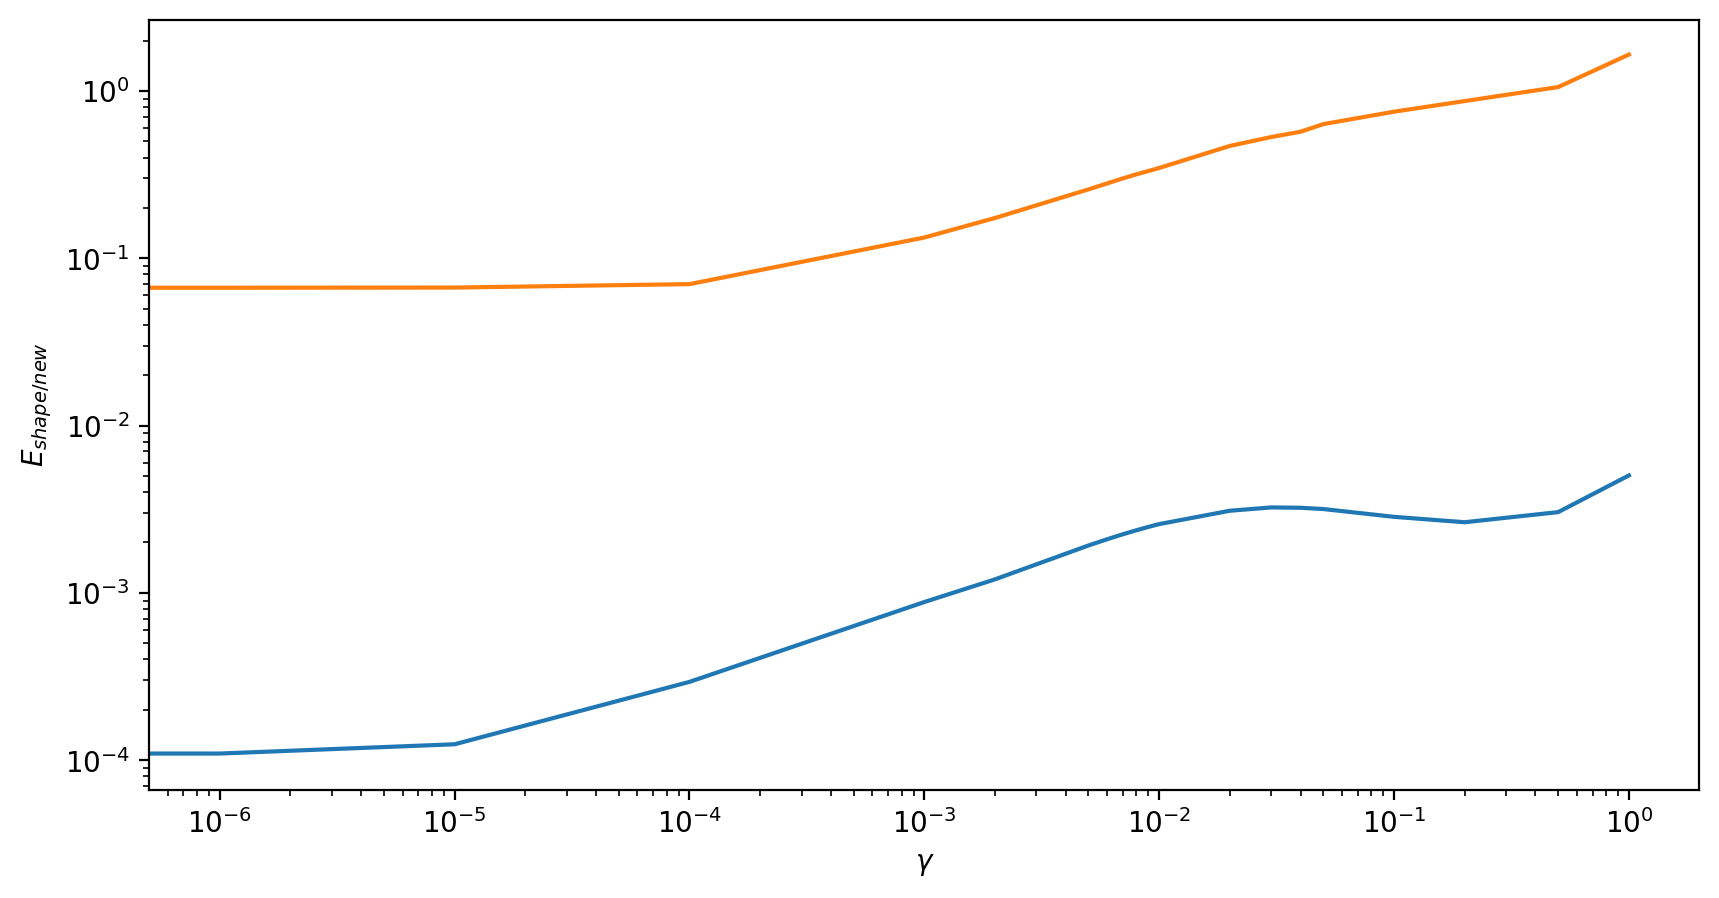

In [44]:

fig, ax = plt.subplots(1,figsize=(10, 5), dpi = 200)
ax.loglog([float(gamma)for gamma in gammas],errors)
ax.loglog([float(gamma)for gamma in gammas],errors2)
ax.set_ylabel("$E_{shape/new}$")
ax.set_xlabel("$\\gamma$")

2025-02-03 14:30:27,585 - Probes - INFO - Initializing Probes object:
2025-02-03 14:30:27,586 - Probes - INFO -  ======= Settings =======
2025-02-03 14:30:27,586 - Probes - INFO - output_fname: ./interpolated_fields.csv
2025-02-03 14:30:27,587 - Probes - INFO - write_coords: True
2025-02-03 14:30:27,587 - Probes - INFO - progress_bar: False
2025-02-03 14:30:27,587 - Probes - INFO - point_interpolator_type: multiple_point_legendre_numpy
2025-02-03 14:30:27,588 - Probes - INFO - max_pts: 128
2025-02-03 14:30:27,588 - Probes - INFO - find_points_iterative: [False, 5000]
2025-02-03 14:30:27,589 - Probes - INFO - find_points_comm_pattern: point_to_point
2025-02-03 14:30:27,589 - Probes - INFO - elem_percent_expansion: 0.01
2025-02-03 14:30:27,589 - Probes - INFO - global_tree_type: rank_bbox
2025-02-03 14:30:27,589 - Probes - INFO - global_tree_nbins: 1024
2025-02-03 14:30:27,590 - Probes - INFO - use_autograd: False
2025-02-03 14:30:27,590 - Probes - INFO - find_points_tol: 2.2204460492503

Text(0.5, 0, '$\\gamma$')

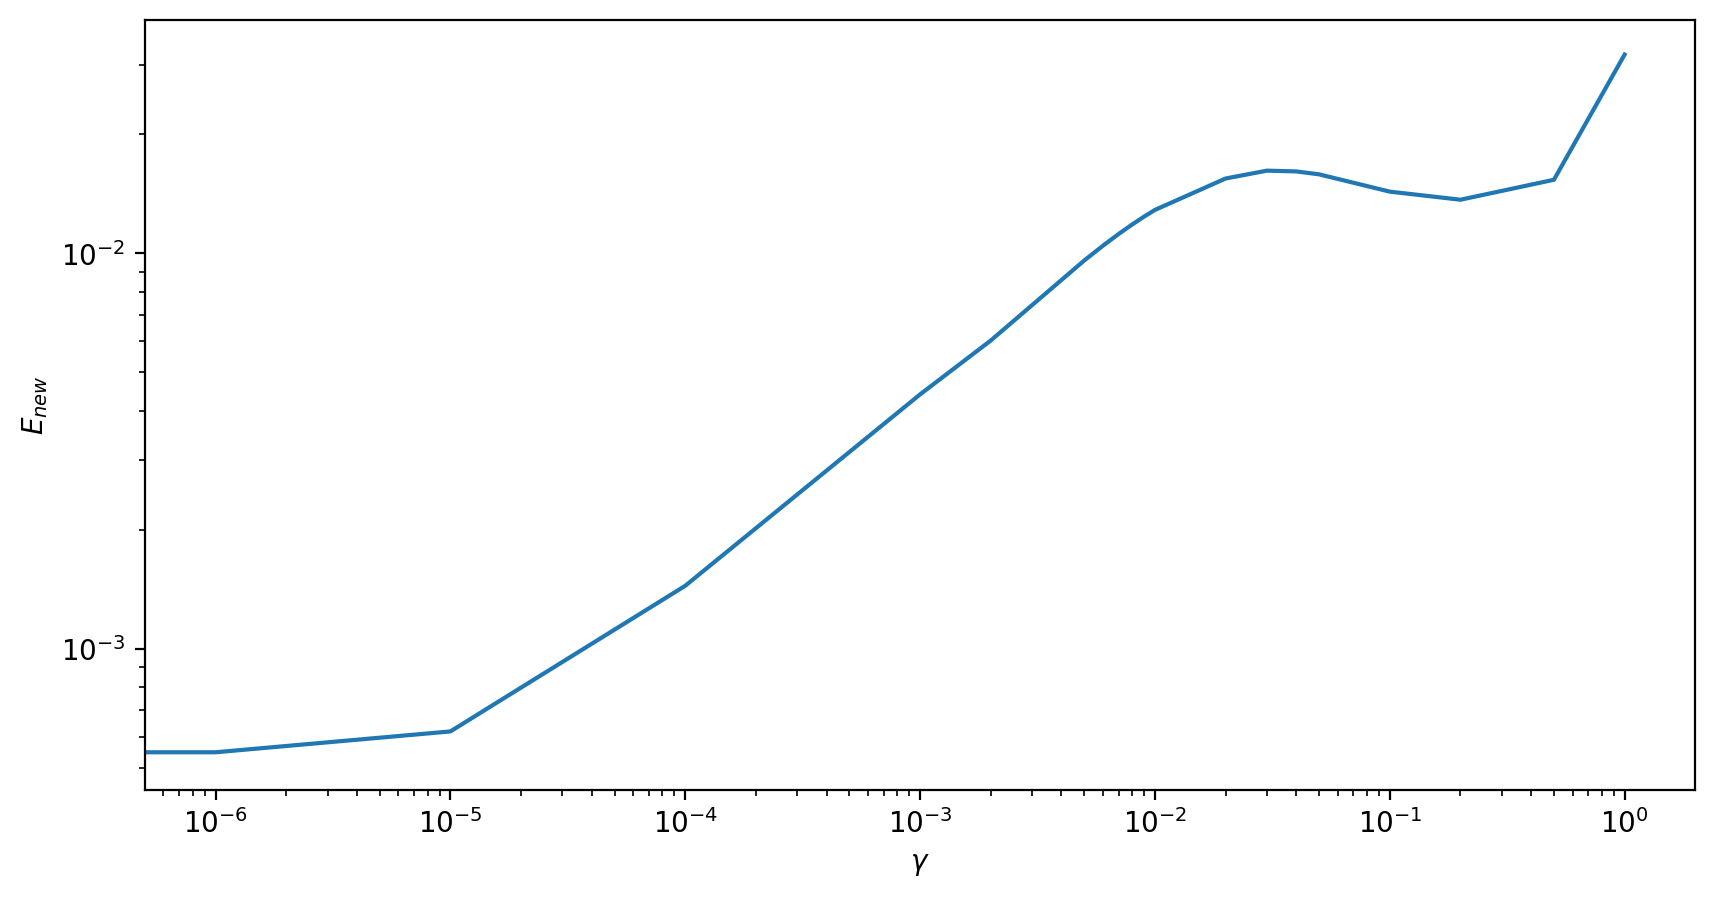

In [57]:
#Another error definition
#Cheks the difference between the value of the computed value and the circle att 0.5 in the original
#integral over initial_condiiton(x,y) = 0.5 - computedvalue(T=4,x,y) 
errors2 = np.zeros(n_gammas)

#Look at things around the cylinder
#Lets extract som lines
npointsx = 200
n_points = npointsx**2
dx = 1.0/(npointsx-1.0)
dy = 1.0/(npointsx-1.0)
line1 = np.zeros((n_points,3))
X , Y = np.meshgrid(np.linspace(0,1,npointsx),np.linspace(0,1,npointsx))
line1[:,0] = X.flatten()
line1[:,1] = Y.flatten()
probes = probes_c(comm, probes = line1, msh = msh, progress_bar = False, point_interpolator_type='multiple_point_legendre_numpy')

for i,gamma in enumerate(gammas):
    file_name = "gamma_" + gamma + "/field0.f00002"
    print(file_name)
    t4 = preadnek(file_name, comm)
    fld = field_c(comm, data = t4)
    probes.interpolate_from_field_list(0.0, fld.fields["temp"], comm, write_data=False)
    errors2[i] = np.sum(abs(probes.interpolated_fields[:,1]-initial_condition(line1[:,0],line1[:,1],epsilon)))*dx*dy

fig, ax = plt.subplots(1,figsize=(10, 5), dpi = 200)
ax.loglog([float(gamma)for gamma in gammas],errors2)
ax.set_ylabel("$E_{new}$")
ax.set_xlabel("$\\gamma$")